In [153]:
import numpy as np

from PIL import Image

from scipy.fft import dctn, idctn
from matplotlib import pyplot as plt
from matplotlib import pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 12)

from dqt import *

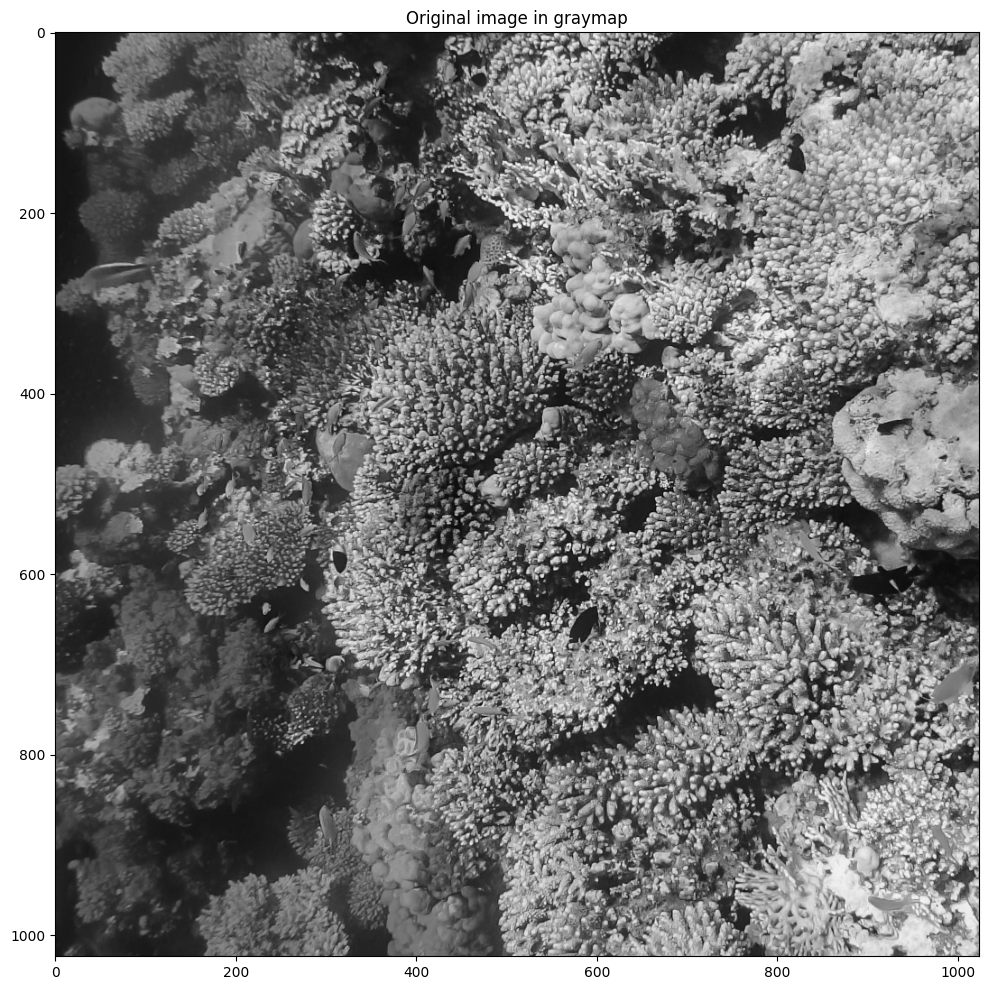

In [154]:
y, cb, cr = Image.open('../../images/coral/coral-1024.png').convert('YCbCr').split()

im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

im = im.astype(np.int64)

plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

plt.imsave('original.png', im, cmap='gray')

In [155]:
dct = np.zeros(im.shape)

dqt = [i*2 for i in dqt_90_dct_lum]

# Do 8x8 DCT on image (in-place)
for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        dim = dctn(im[i:(i+8), j:(j+8)], axes=[0, 1], norm='ortho')

        dct[i:(i+8), j:(j+8)] = (np.rint(dim.ravel() / dqt) * dqt).reshape((8, 8))

Text(0.5, 1.0, '8x8 DCTs of the image')

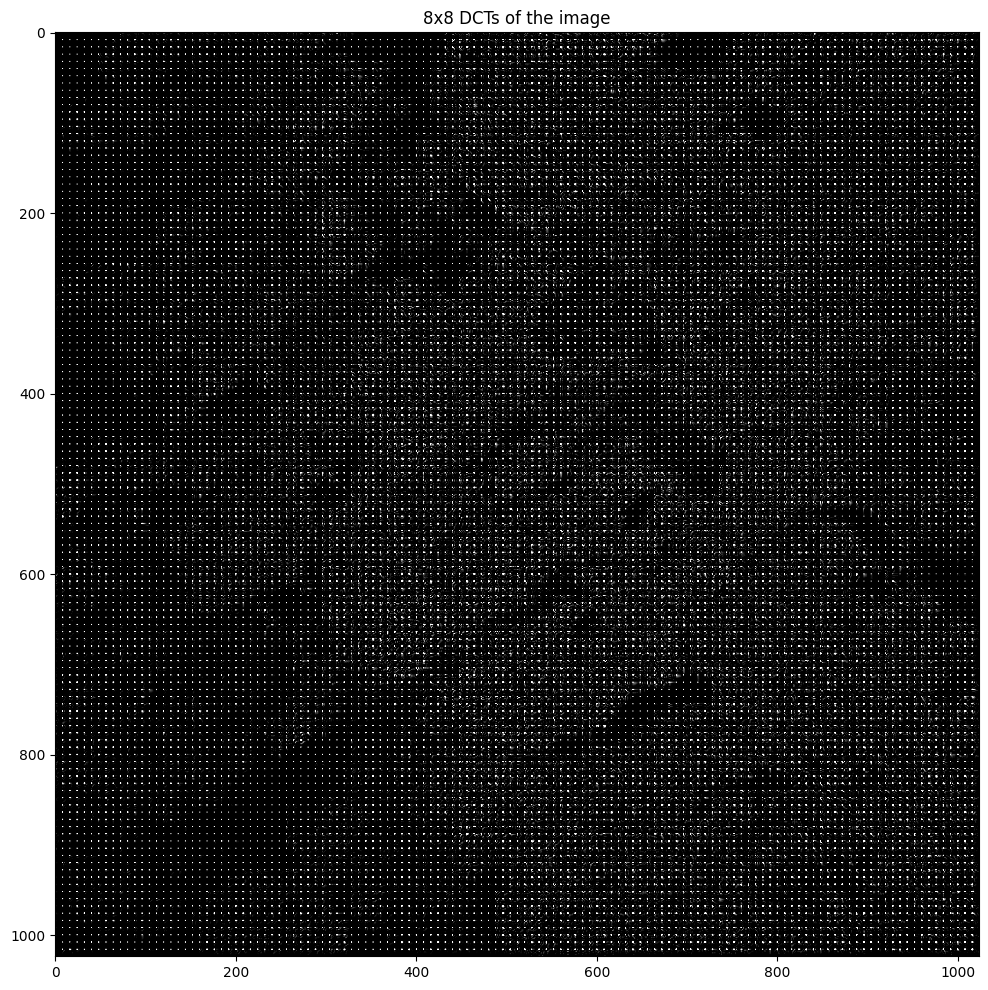

In [156]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.08, vmin=0)
plt.title("8x8 DCTs of the image")

In [157]:
image_dct = np.zeros(im.shape)

# Do 8x8 IDCT on image (in-place)
for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        image_dct[i:(i+8),j:(j+8)] = idctn(dct[i:(i+8), j:(j+8)], axes=[0, 1], norm='ortho')

# image_dct[image_dct < 0] = 0

In [158]:

image_dct = np.clip(image_dct, 0, 255)

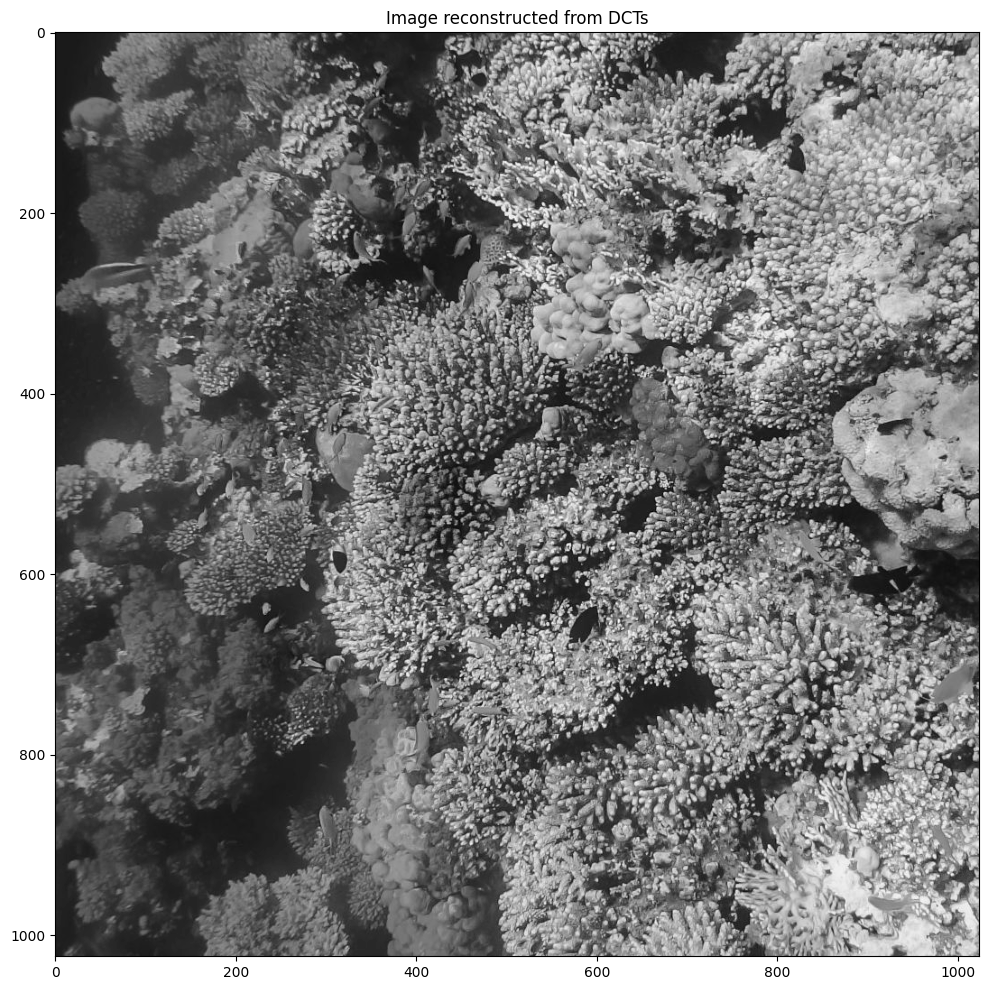

In [159]:
plt.figure()
plt.imshow(image_dct, cmap='gray')
plt.title("Image reconstructed from DCTs")

plt.imsave('dqt_90_dct_lum.png', image_dct, cmap='gray')

In [160]:
import os
os.system("butteraugli original.png dqt_90_dct_lum.png")

7.660640


0